# Titanic Survivals - Machine Learning From Disaster | Data Science

__Description - Prediction of survivals on the Titanic based on age, gender, fare and pclass using different Machine Learning algorithms and estimation of best one with best parameters.__

__Python libraries used :__
    1. Pandas
    2. Scikit-learn
    3. Seaborn
    4. Matplotlib

Import pandas and create a DataFrame _df_ to read titanic survivals dataset. This dataset is downloaded from Kaggle.

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis and Cleaning

DataFrame consists of information which do not contribute in the prediction of Survivals at all like - 
PassengerId, Name, SibSp, Parch, Ticket, Cabin and Embarked. Prediction of Survivals can be made on passenger's gender, age, ticket fare and their class.

### Creating DataFrame _df2_ after filtering unwanted information.

In [2]:
df2 = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns')
df2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### Checking for Null values.

In [3]:
# Checking for any NULL values in the dataframe.
df2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [4]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

We see that Age column has 177 NULL values. Let us inspect Age column.

In [5]:
df2['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [6]:
df2.Age[df2.Age.isnull()].head()

5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
Name: Age, dtype: float64

__Filling mean value of Age column in NULL space.__

In [7]:
# Filling NULL space with mean value.
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

In [8]:
df2.Age.head(20)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
Name: Age, dtype: float64

In [9]:
#Checking for any other NULL value.
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

No more NULL values. We can continue with data cleaning.

In [10]:
df2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Machine Learning Models work only with numbers. Converting values in __Sex__ column to digits by creating dummy values for them.

In [11]:
dummies = pd.get_dummies(df2.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Dummy values created for female and male above has 1 corresponds to Survived and 0 corresponds to Not Survived. 

Creating DataFrame _df3_ by adding _df2_ and _dummy values_.

In [12]:
df3 = pd.concat([df2, dummies], axis = 'columns')
df3.head()

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1


### Preparing train and test data with X as features and Y as labels.

Training the models on features - Age, fare, gender and class. We will drop colums Survived and male. Column __female__ is enough to decide gender with 0 being male and 1 beign female.

In [13]:
# Preparing features to train
X = df3.drop(['Survived', 'Sex', 'male'], axis = 'columns')
X.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [14]:
# Preparing target to train
Y = df3['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Training the Models

Spliting the features and labels into 80% training and 20% test data

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
# Function to predict score
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [92]:
# Importing Classification models 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier


# Creating all the model's objects

GNB_model = GaussianNB()
MNB_model = MultinomialNB()
lr_model = LinearRegression()
log_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()
lasso_model = Lasso(alpha=1, selection='cyclic' )
DT_model = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
Knn_model = KNeighborsClassifier(n_neighbors=5)                      # KNN Model

model_list = [GNB_model, MNB_model, lr_model, log_model, svm_model, rf_model]
model_name = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Linear Regression', 'Logistic Regression', 'SVM', 'RandomForest Classifier']

Fit the models with trainig data

In [98]:
GNB_model.fit(x_train, y_train)
MNB_model.fit(x_train, y_train)
lr_model.fit(x_train, y_train)
log_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)
DT_model.fit(x_train, y_train)
Knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Making Model Prediction and Computing Accuracy


In [61]:
# getting model scores and best model
model_scores = []
for i in range(len(model_list)):
    print('Accuracy with '+ model_name[i] + ' is ' + str(get_score(model_list[i], x_train, x_test, y_train, y_test)))
    model_scores.append(get_score(model_list[i], x_train, x_test, y_train, y_test))
    
print('\n\nMaximum accuracy is ' + str(max(model_scores)) + ' with model : ' + model_name[model_scores.index(max(model_scores))])

Accuracy with Gaussian Naive Bayes is 0.770949720670391
Accuracy with Multinomial Naive Bayes is 0.6927374301675978
Accuracy with Linear Regression is 0.40000123370734797
Accuracy with Logistic Regression is 0.776536312849162
Accuracy with SVM is 0.6759776536312849
Accuracy with RandomForest is 0.8212290502793296


Maximum accuracy is 0.8044692737430168 with model : RandomForest


Compare the score of each SVM Kernel with test data

In [84]:
algorithm = [GNB_model, MNB_model, lr_model, log_model, svm_model, rf_model, lasso_model, DT_model, Knn_model]
model_name = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Linear Regression', 'Logistic Regression', 'SVM Model', 'Random Forest Clssifier',
              'Lasso Model', 'Decision Tree', 'K Nearest Neighbors']

scores = []
for i in range(len(model_name)):
    y_pred = algorithm[i].predict(x_test)
    y_scores = algorithm[i].score(x_test, y_test)
    scores.append({
            'Model' : model_name[i],
            'Accuracy'  : y_scores
        })


score_df = pd.DataFrame(scores, columns = ['Model', 'Accuracy'])
score_df


,Model,Accuracy
0,Gaussian Naive Bayes,0.770950
1,Multinomial Naive Bayes,0.692737
2,Linear Regression,0.400001
3,Logistic Regression,0.776536
4,SVM Model,0.675978
5,Random Forest Clssifier,0.804469
6,Lasso Model,0.080715
7,Decision Tree,0.007163
8,K Nearest Neighbors,0.692737


In [62]:
print('\n\nMaximum accuracy is ' + str(max(model_scores)) + ' with model : ' + model_name[model_scores.index(max(model_scores))])



Maximum accuracy is 0.8044692737430168 with model : RandomForest


In [85]:
# Making prediction on test data using all the models

y_pred_GNB = GNB_model.predict(x_test)
y_pred_MNB = MNB_model.predict(x_test)
y_pred_lr = lr_model.predict(x_test)
y_pred_log = log_model.predict(x_test)
y_pred_svm = svm_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)
y_pred_lasso = lasso_model.predict(x_test)
y_pred_dt = DT_model.predict(x_test)
y_pred_knn = Knn_model.predict(x_test)

## Evaluating the Model

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

### 1. Evaluating Naive Bayes Gaussian Model

In [74]:
import matplotlib.pyplot as plt
def get_confusion_matrix(y_test, y_pred):
    import seaborn as sn
    plt.figure(figsize = (6,5))
    sn.heatmap(confusion_matrix(y_test,y_pred), cmap="Greens", annot = True)
    plt.xlabel('Predicted Value')
    plt.ylabel('Acual Value')



Classification Report for Naive Bayes Gaussian Model is :

               precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179




Confusion Matrix for Naive Bayes Gaussian Model is :

 None


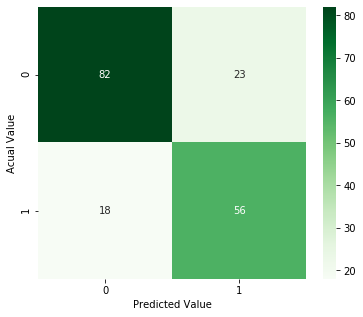

In [77]:
print('\nClassification Report for Naive Bayes Gaussian Model is :\n\n', classification_report(y_test,y_pred_GNB))
print('\n\n\nConfusion Matrix for Naive Bayes Gaussian Model is :\n\n', get_confusion_matrix(y_test,y_pred_GNB))

### 2. Evaluating Naive Bayes Multinomial Model


Classification Report for Naive Bayes Multinomial Model is :

               precision    recall  f1-score   support

           0       0.72      0.79      0.75       105
           1       0.65      0.55      0.60        74

    accuracy                           0.69       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.69      0.69      0.69       179




Confusion Matrix for Naive Bayes Multinomial Model is :

 None


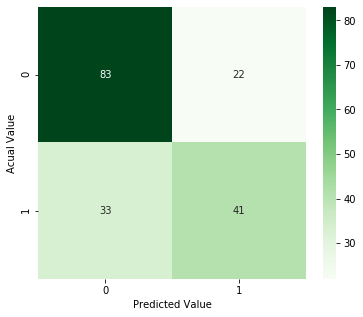

In [78]:
print('\nClassification Report for Naive Bayes Multinomial Model is :\n\n', classification_report(y_test,y_pred_MNB))
print('\n\n\nConfusion Matrix for Naive Bayes Multinomial Model is :\n\n', get_confusion_matrix(y_test,y_pred_MNB))

### 3. Evaluating K Nearest Neighbor (n = 5)


Classification Report for K Nearest Neighbor Model is :

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       105
           1       0.61      0.69      0.65        74

    accuracy                           0.69       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.70      0.69      0.69       179




Confusion Matrix for K Nearest Neighbor Model is :

 None


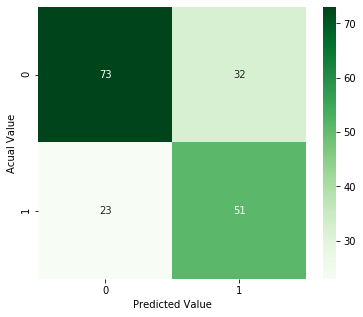

In [91]:
print('\nClassification Report for K Nearest Neighbor Model is :\n\n', classification_report(y_test,y_pred_knn))
print('\n\n\nConfusion Matrix for K Nearest Neighbor Model is :\n\n', get_confusion_matrix(y_test,y_pred_knn))


### 4. Evaluating Logistic Regression Model


Classification Report for Logistic Model is :

               precision    recall  f1-score   support

           0       0.84      0.77      0.80       105
           1       0.71      0.78      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179




Confusion Matrix for Logistic Model is :

 None


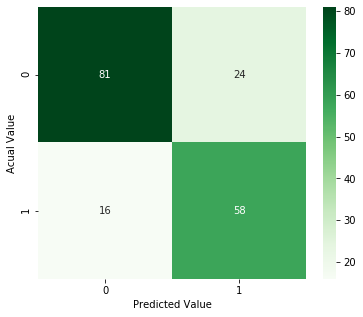

In [80]:
print('\nClassification Report for Logistic Model is :\n\n', classification_report(y_test,y_pred_log))
print('\n\n\nConfusion Matrix for Logistic Model is :\n\n', get_confusion_matrix(y_test,y_pred_log))


### 5. Evaluating SVM Model


Classification Report for SVM Model is :

               precision    recall  f1-score   support

           0       0.67      0.89      0.76       105
           1       0.70      0.38      0.49        74

    accuracy                           0.68       179
   macro avg       0.68      0.63      0.63       179
weighted avg       0.68      0.68      0.65       179




Confusion Matrix for SVM Model is :

 None


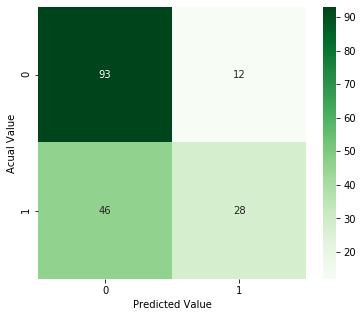

In [81]:
print('\nClassification Report for SVM Model is :\n\n', classification_report(y_test,y_pred_svm))
print('\n\n\nConfusion Matrix for SVM Model is :\n\n', get_confusion_matrix(y_test,y_pred_svm))


### 6. Evaluating Random Forest Model


Classification Report for Random Forest Model is :

               precision    recall  f1-score   support

           0       0.86      0.80      0.83       105
           1       0.74      0.81      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179




Confusion Matrix for Random Forest Model is :

 None


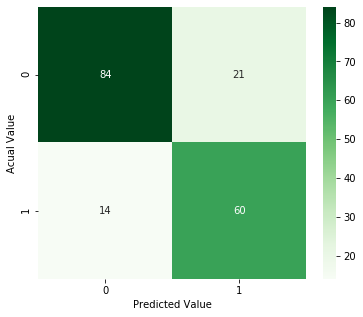

In [97]:
print('\nClassification Report for Random Forest Model is :\n\n', classification_report(y_test,y_pred_rf))
print('\n\n\nConfusion Matrix for Random Forest Model is :\n\n', get_confusion_matrix(y_test,y_pred_rf))


## Predicting Survivals with Models

In [94]:
# Function to predic the survivals on selected model
def predict_survivals(model, pclass, age, fare, sex):
    if model.predict([[pclass, age, fare, sex]]) == 1:
        return 'This Passanger has Survived'
    else:

        return 'This Passenger has Not Survived'

In [99]:
model_list = [GNB_model, MNB_model, lr_model, log_model, svm_model, rf_model]

pclass = 1
age = 25
fare = 8
sex = 0
model = model_list[4]

# Predicting with Random forest model as it has the maximum accuracy
predict_survivals(rf_model, pclass, age, fare, sex)

'This Passenger has Not Survived'

## Result

In [93]:
score_df

,Model,Accuracy
0,Gaussian Naive Bayes,0.770950
1,Multinomial Naive Bayes,0.692737
2,Linear Regression,0.400001
3,Logistic Regression,0.776536
4,SVM Model,0.675978
5,Random Forest Clssifier,0.804469
6,Lasso Model,0.080715
7,Decision Tree,0.007163
8,K Nearest Neighbors,0.692737


Titanic Survivals prediction is performed with different Machine Learning algorithms and found __Random Forest Classifier__ has the Maximum accuracy of __80.45 %.__ 

__I am going to further implement Flask API using _HTML, CSS, Javascript, Python Flask API_ and _Postman_ application in the next Notebook.__